In [20]:

link="https://github.com/DACSS-CSSmeths/Spatial-Exploring/raw/refs/heads/main/maps/countriesCIA.gpkg"

import geopandas as gpd

gpd.list_layers(link)

,name,geometry_type
0,cia,MultiPolygon
1,border,MultiPolygon


In [21]:
# open the map files
countriesCIA=gpd.read_file(link, layer='cia')
worldBorders=gpd.read_file(link, layer='border')

In [11]:
# preview file contents
countriesCIA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   COUNTRY               147 non-null    object  
 1   name                  147 non-null    object  
 2   region                147 non-null    object  
 3   obesityAdults_rate    147 non-null    float64 
 4   TobaccoUse_perc       147 non-null    float64 
 5   Alcohol_LitersPerCap  147 non-null    float64 
 6   tobacco_code          147 non-null    int64   
 7   tobacco_levels        147 non-null    object  
 8   tobacco_custom        147 non-null    object  
 9   alcohol_code          147 non-null    int64   
 10  alcohol_levels        147 non-null    object  
 11  geometry              147 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(6)
memory usage: 13.9+ KB


In [ ]:
#!pip install pysal

In [23]:
# determine binning scheme for 'obesityAdults_rate'
import mapclassify
import numpy as np

np.random.seed(12345)
K=5

theVar=countriesCIA.obesityAdults_rate


# equal intervals
ei5 = mapclassify.EqualInterval(theVar, k=K)
# intervals based on standard deviaton
msd = mapclassify.StdMean(theVar)
# qunatile intervals
q5 = mapclassify.Quantiles(theVar,k=K)
# based on similarity
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity
mp5 = mapclassify.MaxP(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed

<Axes: ylabel='Classifier'>

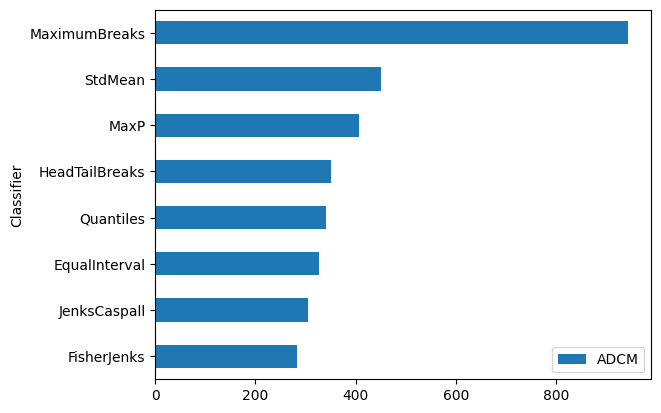

In [24]:
import pandas as pd

# Create a list of classifiers
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5

# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

# see the results
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [25]:
# map of labels for the levels
newLevels={0:'1.very low',1:'2.low', 2:'3.average',3:'4.high', 4:'5.very high'}

# get the values
countriesCIA['obesity_code']=fj5.yb

# copy to new column
countriesCIA=countriesCIA.assign(obesity_levels=countriesCIA.obesity_code)

# recoding
countriesCIA.replace({'obesity_levels':newLevels}, inplace=True)

In [26]:
# preview the data types together
countriesCIA.loc[:,['tobacco_code','tobacco_levels','alcohol_code','alcohol_levels', 'obesity_code', 'obesity_levels']]

,tobacco_code,tobacco_levels,alcohol_code,alcohol_levels,obesity_code,obesity_levels
0,2,3.average,0,1.very low,0,1.very low
1,2,3.average,0,1.very low,2,3.average
2,2,3.average,0,1.very low,1,2.low
3,2,3.average,2,3.average,1,2.low
4,2,3.average,1,2.low,1,2.low
...,...,...,...,...,...,...
142,1,2.low,1,2.low,1,2.low
143,2,3.average,0,1.very low,1,2.low
144,1,2.low,1,2.low,0,1.very low
145,1,2.low,1,2.low,1,2.low


In [27]:
countriesCIA.to_file('countriesCIA.gpkg', driver='GPKG', layer='cia')
worldBorders.to_file('countriesCIA.gpkg', driver='GPKG', layer='border')